In [1]:
using DelimitedFiles
using PyPlot
using Statistics
using JLD2
close("all")


include("fran_torch.jl")

cd("C:\\Users\\Gabriel Francisco\\Desktop\\Curso CNN")

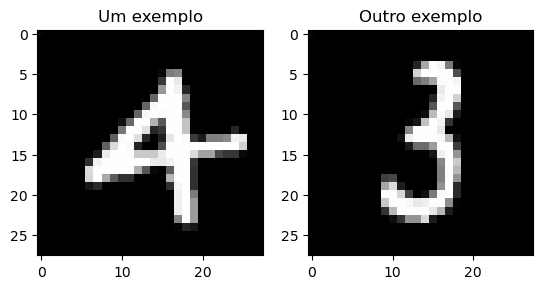

In [2]:
#CARREGANDO OS DADOS 
data = readdlm("mnist_3000.txt")[:,1:end-1]

m_in = 28
n_in = 28

X_im = zeros(28,28, size(data,1))

for i in sortperm(rand(size(data,1)))
    global X_im[:,:, i] = copy(reshape(data[i,:], m_in, n_in)')
end 

X_im = X_im/255

ex_1 = sortperm(rand(size(data,1)))[1]
ex_2 = sortperm(rand(size(data,1)))[1]

figure()
subplot(121)
imshow(X_im[:,:,ex_1], cmap = "gray")
title("Um exemplo")
subplot(122)
imshow(X_im[:,:,ex_2], cmap = "gray")
title("Outro exemplo")
display(gcf())

In [3]:
training_idx = collect(1:1:Int(round(0.7*size(data,1))))
#separando a base de treino em batches 
n_batches = 50
batch_size = Int(floor(length(training_idx)/n_batches))
batches = [] 
for n in 1:n_batches-1
    push!(batches, training_idx[(n-1)*batch_size+1:n*batch_size])
end
push!(batches, training_idx[(n_batches-1)*batch_size+1:end]);


In [5]:
##TREINANDO AUTOENCODER##

model = network([conv2d(k=5, channels=16, stride=1, activation="relu"),
                 maxpooling(k=2, stride=2),
                 conv2d(k=3, channels=32, stride=1, activation="relu"),
                 conv2d(k=3, channels=6, stride=1, activation="relu"),
                 #maxpooling(k=2, stride=2),
                 conv2d_transpose(k=3, channels_out=32, stride=1, activation="relu"),
                 conv2d_transpose(k=3, channels_out=16, stride=1, activation="relu"),
                 conv2d_transpose(k=5, channels_out=1, stride=2, activation="logistic")
], 0, 0)

model = init_weights(model, m_in, n_in);

Começando treinamento
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


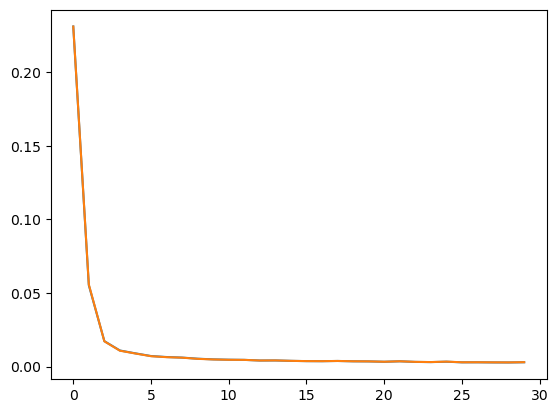

In [6]:
#lr = 0.00005
lr = 0.003
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
epochs = 30

losses = []
losses_test = []

println("Começando treinamento")

for epoch in 1:epochs
    #global cont +=1
    println(epoch)

    #avaliando desempenho na base de treinamento
    inputs = X_im[:,:, 1:Int(round(0.7*size(data,1)))]
    ground_truth = X_im[1:end-1, 1:end-1,1:Int(round(0.7*size(data,1)))]
    loss, _ = evaluate_nn(inputs, ground_truth)
    push!(losses, loss)
    #push!(train_accs, acc)

    #avaliando desempenho na base de teste
    inputs = X_im[:,:, Int(round(0.7*size(data,1)))+1:end]
    ground_truth = X_im[1:end-1, 1:end-1,Int(round(0.7*size(data,1)))+1:end]
    loss, _ = evaluate_nn(inputs, ground_truth)
    push!(losses_test, loss)
    #push!(train_accs, acc)
    
    #treinamento
    train_nn(batches, X_im[:,:,1:Int(round(0.7*size(data,1)))], X_im[1:end-1, 1:end-1,1:Int(round(0.7*size(data,1)))], "adam")
end


figure()
plot(losses)
hold 
plot(losses_test)
display(gcf())



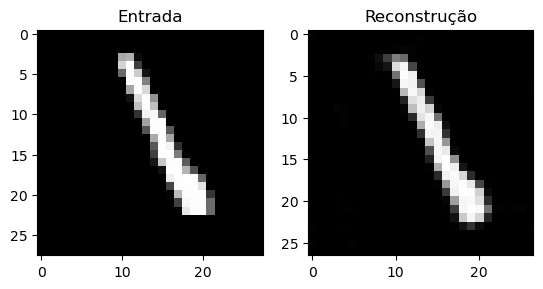

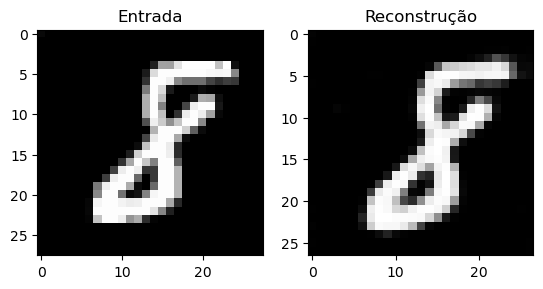

In [7]:
##EXEMPLOS TREINO##
end_train = Int(round(0.7*size(data,1)))
ex1 = sortperm(rand(end_train))[1]
ex2 = sortperm(rand(end_train))[1]

model.training = 0; #model.nn[end].Y = model.nn[end].Y*0
 
input1 = X_im[:,:,ex1]; forward_nn(input1); out1 = copy(model.nn[end].Y); #model.nn[end].Y = model.nn[end].Y*0
input2 = X_im[:,:,ex2]; forward_nn(input2); out2 = copy(model.nn[end].Y); #model.nn[end].Y = model.nn[end].Y*0

figure()
subplot(121)
imshow(input1, cmap = "gray")
title("Entrada")
subplot(122)
imshow(out1, cmap = "gray")
title("Reconstrução")
display(gcf())

figure()
subplot(121)
imshow(input2, cmap = "gray")
title("Entrada")
subplot(122)
imshow(out2, cmap = "gray")
title("Reconstrução")
display(gcf())

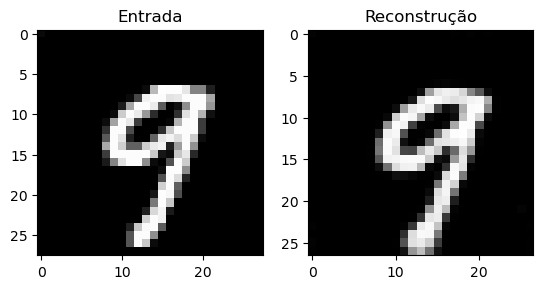

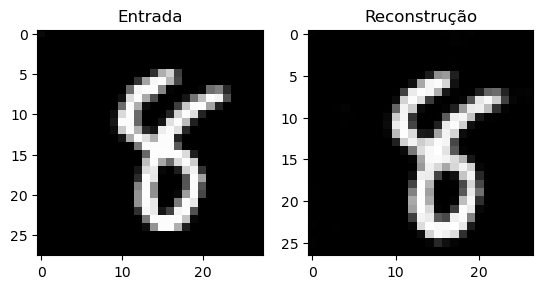

In [9]:
##EXEMPLOS TESTE##
end_train = Int(round(0.7*size(data,1)))
ex1 = sortperm(rand(size(data,1)-end_train))[1]+end_train
ex2 = sortperm(rand(size(data,1)-end_train))[1]+end_train

input1 = X_im[:,:,ex1]; forward_nn(input1); out1 = copy(model.nn[end].Y); model.nn[end].Y = model.nn[end].Y*0
input2 = X_im[:,:,ex2]; forward_nn(input2); out2 = copy(model.nn[end].Y);  model.nn[end].Y = model.nn[end].Y*0

figure()
subplot(121)
imshow(input1, cmap = "gray")
title("Entrada")
subplot(122)
imshow(out1/maximum(out1), cmap = "gray")
title("Reconstrução")
display(gcf())

figure()
subplot(121)
imshow(input2, cmap = "gray")
title("Entrada")
subplot(122)
imshow(out2, cmap = "gray")
title("Reconstrução")
display(gcf())